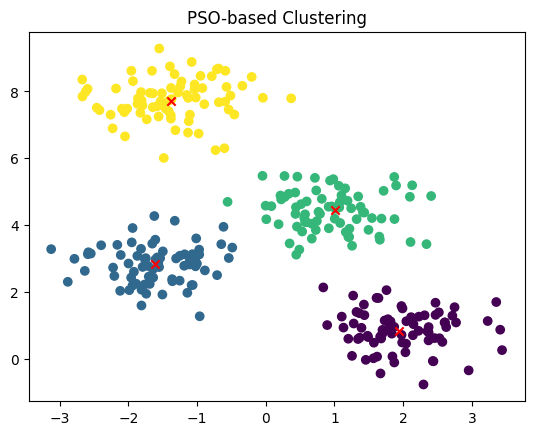

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# PSO parameters
num_particles = 30
num_iterations = 100
num_clusters = 4
w = 0.5       # inertia weight
c1 = 1.5      # cognitive coefficient
c2 = 1.5      # social coefficient

# Initialize particles
class Particle:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        self.position = data[np.random.choice(range(len(data)), num_clusters)]
        self.velocity = np.zeros_like(self.position)
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()

    def evaluate(self):
        distances = np.linalg.norm(self.data[:, None] - self.position[None, :], axis=2)
        closest = np.argmin(distances, axis=1)
        score = sum(np.linalg.norm(self.data[i] - self.position[closest[i]])**2 for i in range(len(self.data)))
        return score

    def update(self, global_best):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best - self.position)
        self.velocity = w * self.velocity + cognitive + social
        self.position += self.velocity
        score = self.evaluate()
        if score < self.best_score:
            self.best_score = score
            self.best_position = np.copy(self.position)

# Initialize swarm
swarm = [Particle(data, num_clusters) for _ in range(num_particles)]
global_best = min(swarm, key=lambda p: p.best_score).best_position

# PSO loop
for _ in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
    global_best = min(swarm, key=lambda p: p.best_score).best_position

# Final clustering
distances = np.linalg.norm(data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)

# Plot results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(global_best[:, 0], global_best[:, 1], c='red', marker='x')
plt.title("PSO-based Clustering")
plt.show()